# Include library

In [1]:
import torch, os, time, copy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from torch.utils.data import Dataset
from copy import deepcopy
import seaborn as sns
# sns.set(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
class Helper():
    @staticmethod
    def load_tensor(path):
        if not os.path.exists(path):
            return None
        return torch.load(path)

def show_random_slice(data, label, rows, title=''):
    fig, ax = plt.subplots(rows, 2, figsize=(10,9))
    for row in range(rows):
        sample_slice = np.random.randint(0, data.shape[0], dtype=np.int64)
        ax[row, 0].set_title('Slice #{}'.format(sample_slice))
        ax[row, 0].imshow(data[sample_slice], cmap='gray')
        ax[row, 1].set_title('Mask')
        ax[row, 1].imshow(label[sample_slice])
    plt.show()
    
class Bloodset(Dataset):
    def __init__(self):
        super().__init__()
        self.reset()

    def reset(self):
        self._volume = []
        self._liver = []
        self._vessel = []

    def append(self, volume, liver, vessel):
        self._volume.append(volume)
        self._liver.append(liver)
        self._vessel.append(vessel)

    def __getitem__(self, i):
        return self._volume[i], self._liver[i], self._vessel[i]

    def __len__(self):
        return len(self._volume)

# Load dataset - original DATASET


In [6]:
DIR = '/content/drive/My Drive/Tumor_src/Datasets/3Dircad/Zoom_only_10'

dataset = Bloodset()
for i in range(20):
    print('Loading patient #{}'.format(i))
    volume = Helper.load_tensor(str(DIR) + '/VOLUME/volume_' + str(i) + '.pth')
    liver  = Helper.load_tensor(str(DIR) + '/LIVER/volume_' + str(i) + '.pth')
    vessel = Helper.load_tensor(str(DIR) + '/VESSEL/volume_' + str(i) + '.pth')
    dataset.append(volume, liver, vessel)

Loading patient #0
Loading patient #1
Loading patient #2
Loading patient #3
Loading patient #4
Loading patient #5
Loading patient #6
Loading patient #7
Loading patient #8
Loading patient #9
Loading patient #10
Loading patient #11
Loading patient #12
Loading patient #13
Loading patient #14
Loading patient #15
Loading patient #16
Loading patient #17
Loading patient #18
Loading patient #19


# Analyze a sample from Dataset

In [ ]:
sample_idx = np.random.randint(0, len(dataset), dtype=np.int64)
sample_idx = 15
imvol, imlabel = dataset[sample_idx]

print('Number of samples in dataset: {}'.format(len(dataset)))
print('Sample #: ', sample_idx)
print(' + type of sample: {}  -- size: {}'.format(type(imvol), imvol.shape))
print(' + type of label: ', type(imlabel))
print(' + volume HU value: (min = {}, max = {})'.format(imvol.min(), imvol.max()))
print(' + mean: ', imvol.mean())
print(' + std: ', imvol.std())

u, c = np.unique(imlabel, return_counts=True)
print('--> Rate pixels is vessel label: {:.4f}(%) '.format(100*(c[1]/np.sum(c))))
# print('--> Rate pixels is vessel label: {:.4f}(%) '.format(100*(c[2]/np.sum(c))))
# print('--> Rate pixels is tumor label: {:.4f}(%) '.format(100*(c[3]/np.sum(c))))

sample_slice = np.random.randint(0, imvol.shape[0], dtype=np.int64)
lab_slide = imlabel[sample_slice]
u, c = np.unique(lab_slide, return_counts=True)
print('--> Rate pixels is vessle label of 1 slide: {:.4f}(%) '.format(100*(c[1]/np.sum(c))))


Number of samples in dataset: 20
Sample #:  15
 + type of sample: <class 'numpy.ndarray'>  -- size: (190, 378, 378)
 + type of label:  <class 'numpy.ndarray'>
 + volume HU value: (min = -1202.88671875, max = 1247.03271484375)
 + mean:  -521.15454
 + std:  506.73813
--> Rate pixels is vessel label: 0.6049(%) 
--> Rate pixels is vessle label of 1 slide: 0.8363(%) 


In [ ]:
imvol.shape

(190, 378, 378)

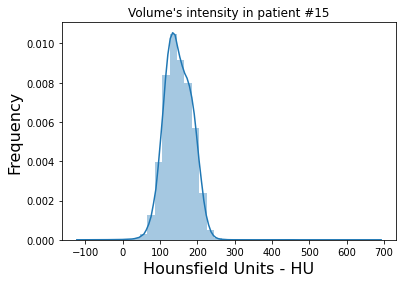

In [ ]:
HU_non = imvol[imlabel == 1]
fig, ax = plt.subplots()
ax = sns.distplot(HU_non.ravel(), bins=40, label='The distribution of intensity HU')
ax.set_xlabel("Hounsfield Units - HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title("Volume's intensity in patient #{}".format(sample_idx))
plt.show()

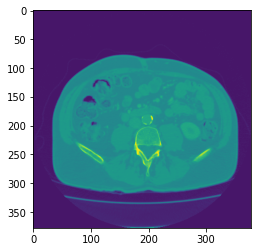

In [ ]:
plt.imshow(imvol[1])

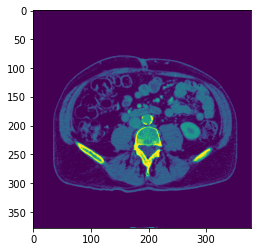

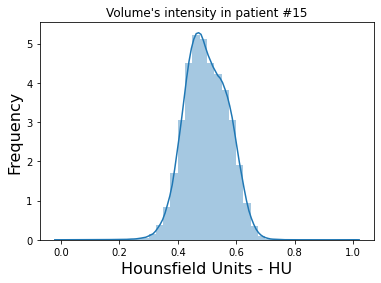

In [ ]:
vol_n = deepcopy(imvol)
ves_n = np.zeros_like(vol_n)
vol_n[vol_n<-100] = -100
vol_n[vol_n>400] = 400

vol_n = (vol_n - -100) / (400 - -100)
plt.imshow(vol_n[1])

# Plot a histogram of the distribution of the pixels
fig, ax = plt.subplots()
ax = sns.distplot(vol_n[imlabel>0].ravel(), bins=40, label='The distribution of intensity HU')
ax.set_xlabel("Hounsfield Units - HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title("Volume's intensity in patient #{}".format(sample_idx))
plt.show()

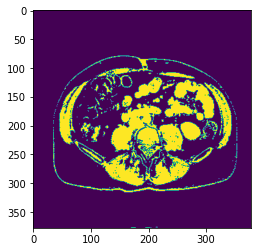

In [ ]:
vol_n = deepcopy(imvol)
ves_n = np.zeros_like(vol_n)
ves_n[(vol_n>0)*(vol_n<300)] = 1
plt.imshow(ves_n[1])


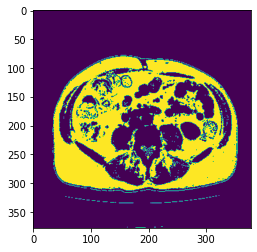

In [ ]:
vol_n = deepcopy(imvol)
ves_n = np.zeros_like(vol_n)
ves_n[(vol_n>-200)*(vol_n<0)] = 1
plt.imshow(ves_n[1])

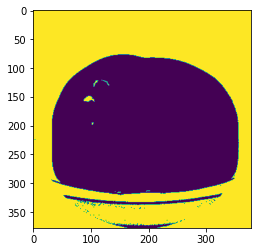

In [ ]:
vol_n = deepcopy(imvol)
ves_n = np.zeros_like(vol_n)
ves_n[vol_n<-900] = 1
plt.imshow(ves_n[1])

In [ ]:
for i in range(20):
    vol, label = dataset[i]
    vessel_HU = vol[label==1]
    mean, std = vessel_HU.mean(), vessel_HU.std()
    print(i, mean-3.5*std, mean+3.5*std)

0 -0.2753009796142578 311.9817523956299
1 30.260225296020508 219.90026664733887
2 -6.711505889892578 273.2138862609863
3 -20.02236557006836 236.7911491394043
4 -41.67405128479004 283.7994327545166
5 -113.87734985351562 335.8517150878906
6 -28.890867233276367 280.96842765808105
7 10.353967666625977 338.7692012786865
8 -75.76768112182617 285.6317253112793
9 33.712646484375 270.6436767578125
10 21.808290481567383 239.47823905944824
11 28.408708572387695 257.4318675994873
12 -30.44199562072754 312.41260719299316
13 44.304945945739746 254.69618320465088
14 -6.187450408935547 292.71760177612305
15 -40.67495536804199 241.02850151062012
16 21.765649795532227 276.2192440032959
17 14.99315071105957 228.30059623718262
18 25.1563720703125 336.8796081542969
19 -47.70020866394043 256.6925792694092


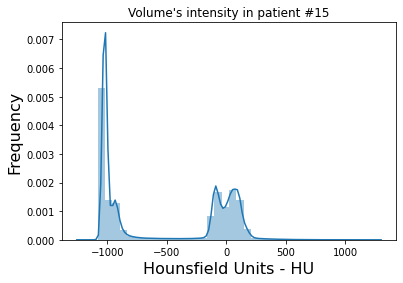

+ (min = -1202.88671875 -- max = 1247.03271484375) of volume value


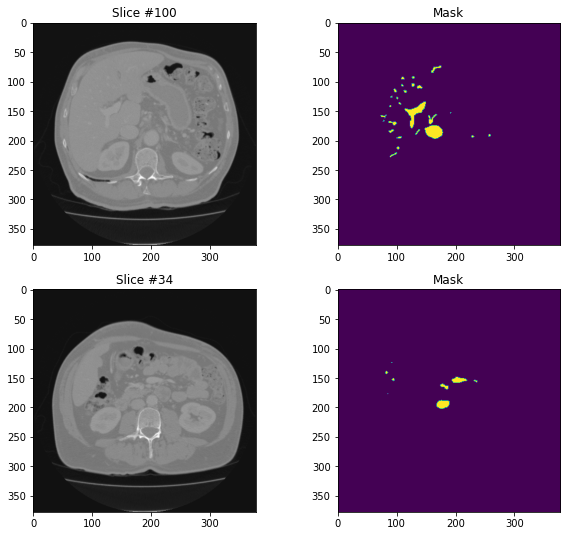

In [ ]:
# Plot a histogram of the distribution of the pixels
fig, ax = plt.subplots()
ax = sns.distplot(imvol.ravel(), bins=40, label='The distribution of intensity HU')
ax.set_xlabel("Hounsfield Units - HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title("Volume's intensity in patient #{}".format(sample_idx))
plt.show()

print('+ (min = {} -- max = {}) of volume value'.format(imvol.min(), imvol.max()))

show_random_slice(imvol, imlabel, 2, title='Some slice in patient #{}'.format(sample_idx))

 + (Min = -211.0 -- Max = 270.0) of intensity of liver label


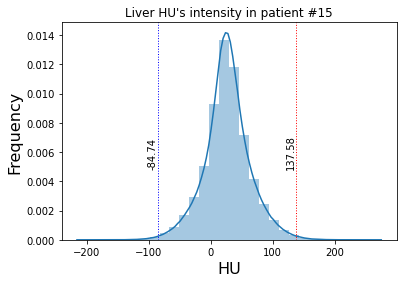

 + (Min = -123.0 -- Max = 320.0) of intensity of vessel label


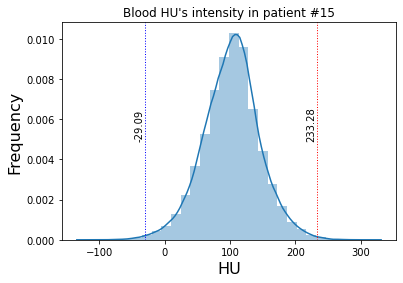

In [ ]:
liver_HU = imvol[imlabel==1]
print(' + (Min = {} -- Max = {}) of intensity of liver label'.format(liver_HU.min(), liver_HU.max()))
mean, std = liver_HU.mean(), liver_HU.std()
left, right = mean-3*std, mean+3*std
fig, ax = plt.subplots()
ax = sns.distplot(liver_HU.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title("Liver HU's intensity in patient #{}".format(sample_idx))
plt.text(left - 17, 0.005, str(round(left,2)), rotation=90)
plt.text(right - 17, 0.005, str(round(right,2)), rotation=90)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.show()

vessel_HU = imvol[imlabel==2]
print(' + (Min = {} -- Max = {}) of intensity of vessel label'.format(vessel_HU.min(), vessel_HU.max()))
mean, std = vessel_HU.mean(), vessel_HU.std()
left, right = mean-3*std, mean+3*std
fig, ax = plt.subplots()
ax = sns.distplot(vessel_HU.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.text(left - 17, 0.005, str(round(left,2)), rotation=90)
plt.text(right - 17, 0.005, str(round(right,2)), rotation=90)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.title("Blood HU's intensity in patient #{}".format(sample_idx))
plt.show()

# tumor_HU = imvol[imlabel==3]
# print(' + (Min = {} -- Max = {}) of intensity of vessel label'.format(tumor_HU.min(), tumor_HU.max()))
# fig, ax = plt.subplots()
# ax = sns.distplot(tumor_HU.ravel(), bins=30)
# ax.set_xlabel("HU",fontsize=16)
# ax.set_ylabel("Frequency",fontsize=16)
# plt.title("Tumor HU's intensity in patient #{}".format(sample_idx))
# plt.show()

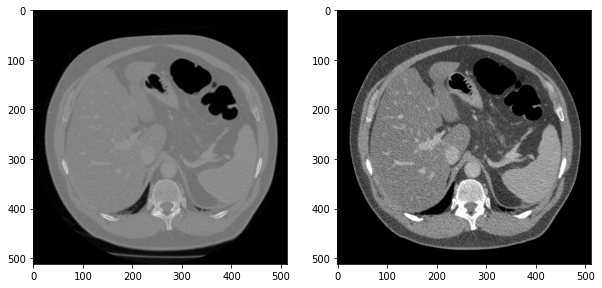

In [ ]:
# Test normolization depend on the whole dataset's intensity
data, mask = dataset[15]
data[data<-250] = -250
data[data>300] = 300

_, ax = plt.subplots(1, 2, figsize=(10,7))
ax[0].imshow(dataset[15][0][96], cmap='gray')
ax[1].imshow(data[96], cmap='gray')
ax[0].grid(False)
ax[1].grid(False)
plt.show()

# plot range of intensity liver and vessel in CT scan

In [ ]:
# save range of std value of HU liver and vessel
mean_livers = []
mean_std_livers = []
mean_vessels = []
mean_std_vessels = []
for i in range(20):
    vol, liver, vessel = dataset[i]
    liver_HU = vol[liver==1]
    vessel_HU = vol[vessel==1]

    liver_mean, liver_std = liver_HU.mean(), liver_HU.std()
    vessel_mean, vessel_std = vessel_HU.mean(), vessel_HU.std()

    mean_livers.append(int(liver_mean))
    mean_std_livers.append((liver_mean, liver_std))

    mean_vessels.append(int(vessel_mean))
    mean_std_vessels.append((vessel_mean, vessel_std))

In [ ]:
a, b ,c = [], [] ,[]
for i in range(20):
    x = mean_vessels[i]
    if x < 125:
        a.append((i, x))
    elif x > 150:
        c.append((i, x))
    else:
        b.append((i, x))
a

[(3, 108), (4, 121), (5, 110), (8, 104), (15, 100), (17, 122), (19, 104)]

In [ ]:
b

[(1, 125),
 (2, 133),
 (6, 126),
 (10, 130),
 (11, 142),
 (12, 141),
 (13, 149),
 (14, 143),
 (16, 149)]

In [ ]:
c

[(0, 155), (7, 174), (9, 152), (18, 179)]

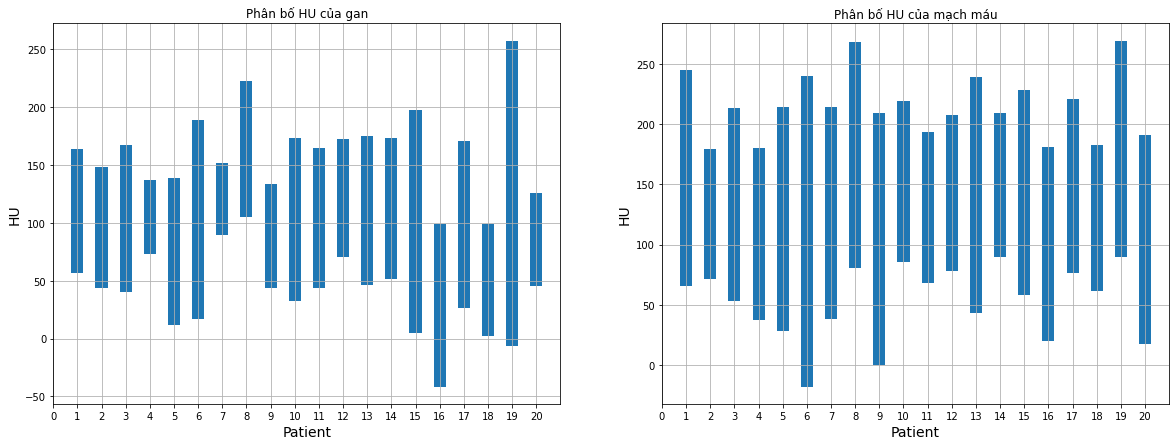

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,7))
patient_label = list(range(21))
 
for i in range(1,21):
    pos = (patient_label[i]-0.25, 0.5)
    value = mean_std_livers[i-1]
    fvalue = (value[0]-2*value[1], 4*value[1])
    ax[0].broken_barh([pos], fvalue, facecolors='tab:blue')
ax[0].set_xlim(0, 21)
ax[0].set_ylabel('HU', fontsize='14')
ax[0].set_xlabel('Patient', fontsize='14')
ax[0].set_xticks(patient_label)
ax[0].set_xticklabels(patient_label)
ax[0].title.set_text('Phân bố HU của gan')

for i in range(1,21):
    pos = (patient_label[i]-0.25, 0.5)
    value = mean_std_vessels[i-1]
    fvalue = (value[0]-2*value[1], 4*value[1])
    ax[1].broken_barh([pos], fvalue, facecolors='tab:blue')
ax[1].set_xlim(0, 21)
ax[1].set_ylabel('HU', fontsize='14')
ax[1].set_xlabel('Patient', fontsize='14')
ax[1].set_xticks(patient_label)
ax[1].set_xticklabels(patient_label)
ax[1].title.set_text('Phân bố HU của mạch máu')

ax[0].grid(True)
ax[1].grid(True)
plt.show()

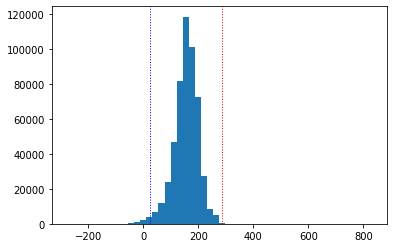

In [ ]:
vol_i, label_i = dataset[0]
hu_i = vol_i[label_i>0]
mean, std = int(hu_i.mean()), int(hu_i.std())
left = mean - 3*std
right = mean + 3*std
plt.hist(hu_i.ravel(), bins=50)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.show()

# Compare 2 patient distribution

In [ ]:
vol_8, liver_8, ves_8 = dataset[7]
vol_9, liver_9, ves_9 = dataset[8]

hu_liver_8 = vol_8[liver_8>0]
hu_liver_9 = vol_9[liver_9>0]

hu_ves_8 = vol_8[ves_8>0]
hu_ves_9 = vol_9[ves_9>0]

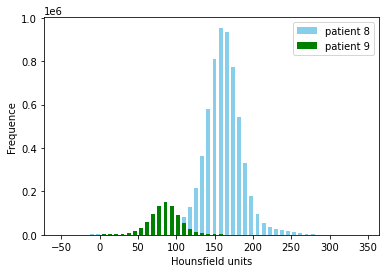

In [ ]:
range_hist = (-50, 350)
hist_liver_8 = np.histogram(hu_liver_8, bins=50, range=range_hist)
hist_liver_9 = np.histogram(hu_liver_9, bins=50, range=range_hist)

hist_ves_8 = np.histogram(hu_ves_8, bins=50, range=range_hist)
hist_ves_9 = np.histogram(hu_ves_9, bins=50, range=range_hist)

plt.bar(hist_liver_8[1][:-1], hist_liver_8[0], 5, color='skyblue', label='patient 8')
plt.bar(hist_liver_9[1][:-1], hist_liver_9[0], 5, color='green', label='patient 9')

# plt.title('Histogram')
plt.xlabel('Hounsfield units')
plt.ylabel('Frequence')
plt.legend()
plt.show()


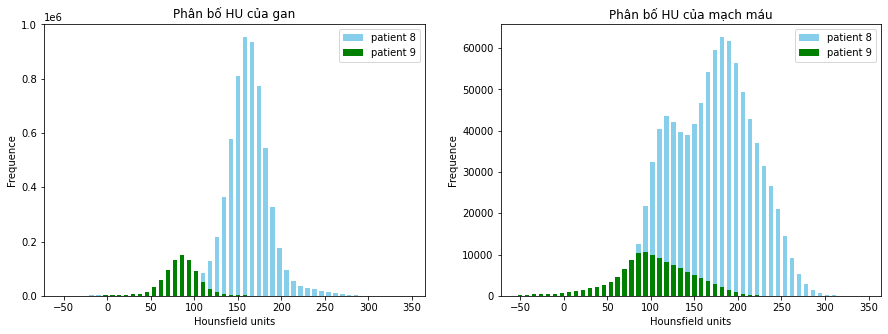

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].bar(hist_liver_8[1][:-1], hist_liver_8[0], 5, color='skyblue', label='patient 8')
ax[0].bar(hist_liver_9[1][:-1], hist_liver_9[0], 5, color='green', label='patient 9')

ax[1].bar(hist_ves_8[1][:-1], hist_ves_8[0], 5, color='skyblue', label='patient 8')
ax[1].bar(hist_ves_9[1][:-1], hist_ves_9[0], 5, color='green', label='patient 9')

ax[0].title.set_text('Phân bố HU của gan')
ax[1].title.set_text('Phân bố HU của mạch máu')

ax[0].set_xlabel('Hounsfield units')
ax[0].set_ylabel('Frequence')
ax[1].set_xlabel('Hounsfield units')
ax[1].set_ylabel('Frequence')
ax[0].legend()
ax[1].legend()
plt.show()

# Analyze the whole dataset

In [ ]:
liverHU = np.array([])
vesselHU = np.array([])
tumorHU = np.array([])
volumeHU = np.array([])
for i in range(20):
    vol, liver, vessel = dataset[i]
    volumeHU = np.append(volumeHU, vol.ravel())
    liverHU = np.append(liverHU, vol[label == 1])
    vesselHU = np.append(liverHU, vol[label == 2])
    if len(data[label == 3])>0:
        tumorHU = np.append(tumorHU, data[label == 3])


-979.0 1023.0


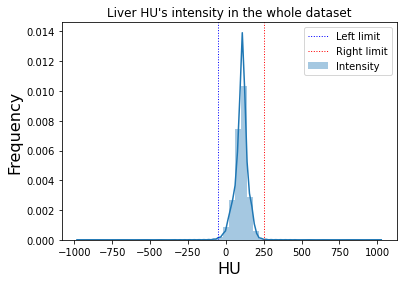

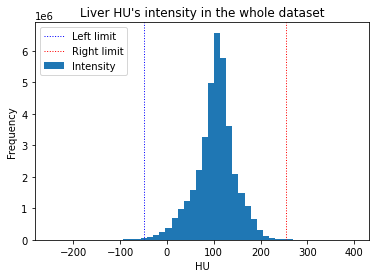

In [ ]:
print(liverHU.min(), liverHU.max())
liverHU = liverHU[liverHU!=0]
mean, std = liverHU.mean(), liverHU.std()
left = mean - 3.5*std
right = mean + 3.5*std

fig, ax = plt.subplots()
ax = sns.distplot(liverHU.ravel(), bins=50, label='Intensity')
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.title("Liver HU's intensity in the whole dataset")
plt.legend()
plt.show()

-979.0 1023.0


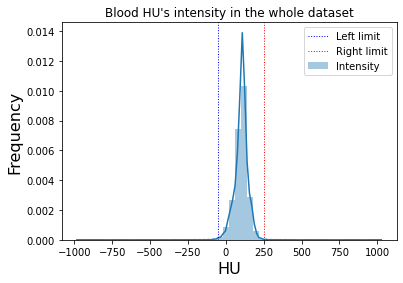

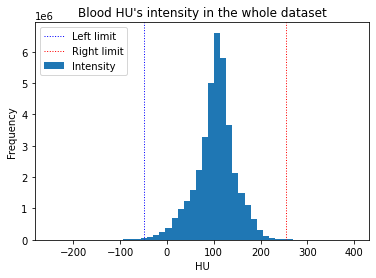

In [ ]:
print(vesselHU.min(), vesselHU.max())
vesselHU = vesselHU[vesselHU!=0]
mean, std = vesselHU.mean(), vesselHU.std()
left = mean - 3.5*std
right = mean + 3.5*std

fig, ax = plt.subplots()
ax = sns.distplot(vesselHU.ravel(), bins=50, label='Intensity')
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.title("Blood HU's intensity in the whole dataset")
plt.legend()
plt.show()

-708.0 1023.0


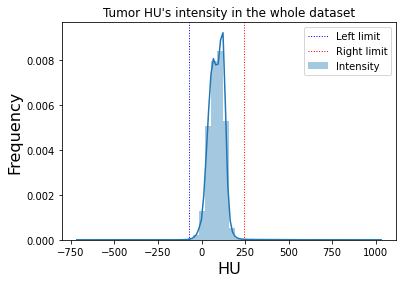

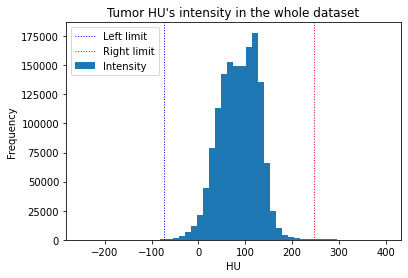

In [ ]:
print(tumorHU.min(), tumorHU.max())
tumorHU = tumorHU[tumorHU!=0]
mean, std = tumorHU.mean(), tumorHU.std()
left = mean - 3.5*std
right = mean + 3.5*std

fig, ax = plt.subplots()
ax = sns.distplot(tumorHU.ravel(), bins=50, label='Intensity')
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
plt.title("Tumor HU's intensity in the whole dataset")
plt.legend()
plt.show()

In [ ]:
liverHU = np.array([])
for i in range(20):
    print("Patient #{}".format(i+1))
    data = copy.deepcopy(volume[i])
    liverHU = data[liver[i] == 1]
    liverHU = liverHU[liverHU!=0]
    mean, std = liverHU.mean(), liverHU.std()
    left = mean - 3.5*std
    right = mean + 3.5*std

    fig, ax = plt.subplots()
    ax = sns.distplot(liverHU.ravel(), bins=30, label='The intensity of vessel HU in the whole dataset')
    ax.set_xlabel("HU's Liver",fontsize=16)
    ax.set_ylabel("Frequency",fontsize=16)
    plt.axvline(left, color='b', linestyle=':', linewidth=1, label="Left limit")
    plt.axvline(right, color='r', linestyle=':', linewidth=1, label="Right limit")
    plt.grid(False)
    plt.show()

Patient #1


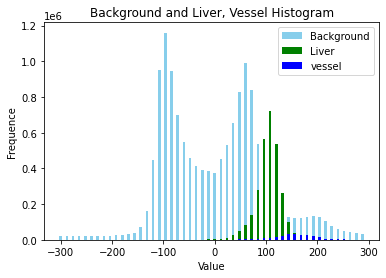

Patient #2


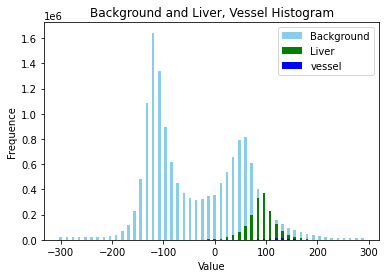

Patient #3


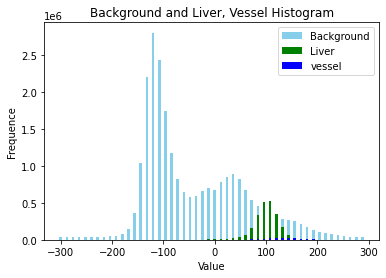

Patient #4


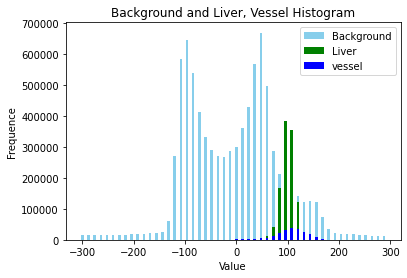

Patient #5


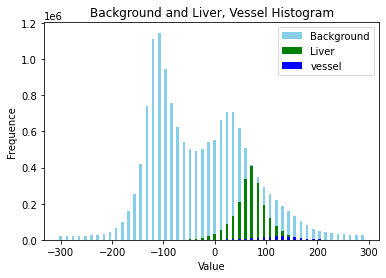

Patient #6


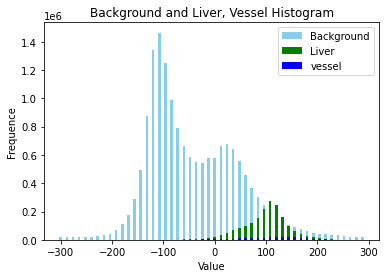

Patient #7


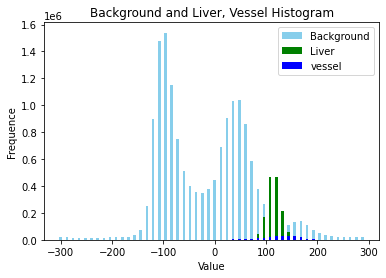

Patient #8


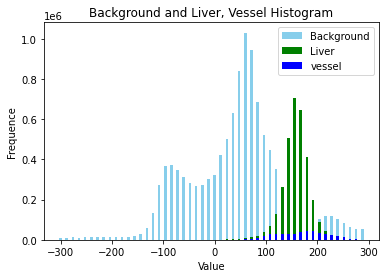

Patient #9


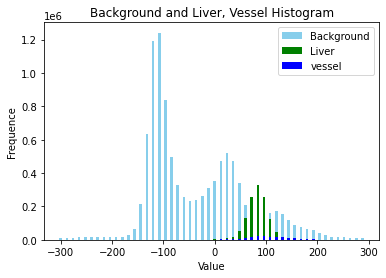

Patient #10


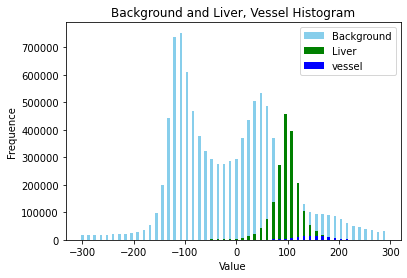

Patient #11


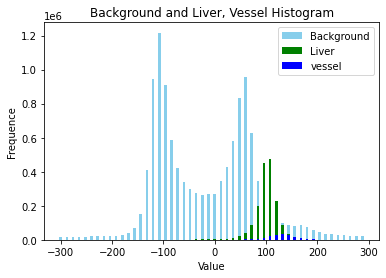

Patient #12


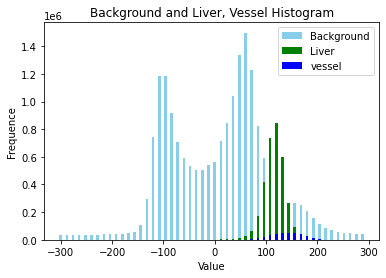

Patient #13


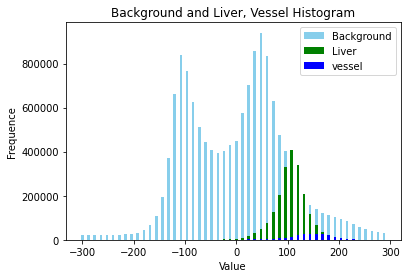

Patient #14


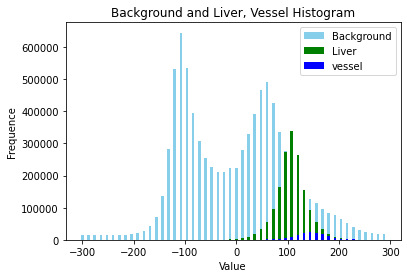

Patient #15


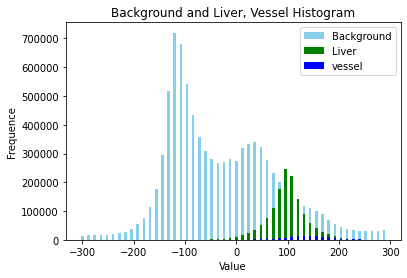

Patient #16


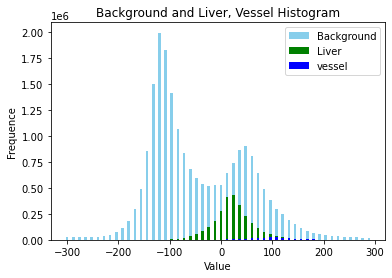

Patient #17


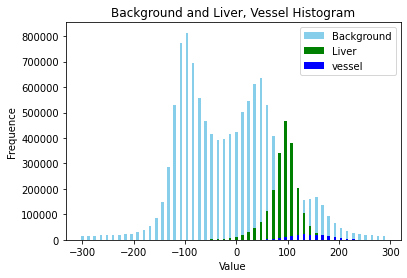

Patient #18


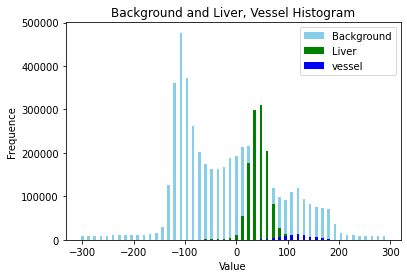

Patient #19


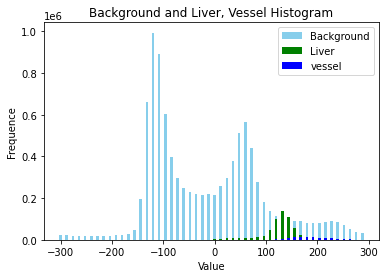

Patient #20


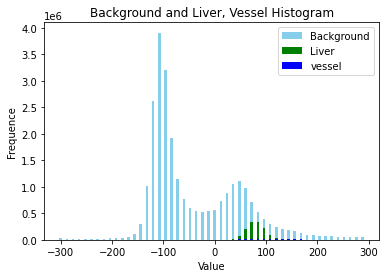

In [ ]:
for i in range(20):
    print("Patient #{}".format(i+1))
    volume_data, liver_data, vessel_data = dataset[i]

    vol_bg = volume_data[(volume_data != 0)*(liver_data == 0)]
    vol_liver = volume_data[(volume_data != 0)*(liver_data != 0)]
    vol_vessel = volume_data[(volume_data != 0)*(vessel_data != 0)]

    range_hist = (-300, 300)
    bins = 50

    bg_hist = np.histogram(vol_bg, bins=bins, range=range_hist)
    liver_hist = np.histogram(vol_liver, bins=bins, range=range_hist)
    vessel_hist = np.histogram(vol_vessel, bins=bins, range=range_hist)

    plt.bar(bg_hist[1][:-1], bg_hist[0], 5, color='skyblue', label='Background')
    plt.bar(liver_hist[1][:-1], liver_hist[0], 5, color='green', label='Liver')
    plt.bar(vessel_hist[1][:-1], vessel_hist[0], 5, color='blue', label='vessel')

    plt.title('Background and Liver, Vessel Histogram')
    plt.xlabel('Value')
    plt.ylabel('Frequence')
    plt.legend()
    plt.show()
    

In [ ]:
idx = 2
data  = copy.deepcopy(volume[idx])
liver_data  = copy.deepcopy(liver[idx])
vessel_data  = copy.deepcopy(vessel[idx])

data_nonliver = data[(data!=0) * (liver_data==0)]
data_liver = data[(data!=0) * (liver_data!=0)]
data_nonvessel = data[(data!=0) * (vessel_data==0)]
data_vessel = data[(data!=0) * (vessel_data!=0)]


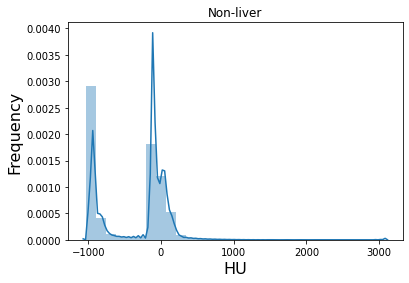

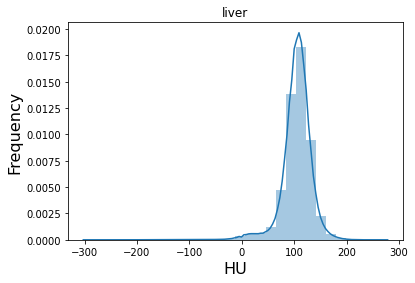

In [ ]:
fig, ax = plt.subplots()
ax = sns.distplot(data_nonliver.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title('Non-liver')
plt.grid(False)
plt.show()

fig, ax = plt.subplots()
ax = sns.distplot(data_liver.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title('liver')
plt.grid(False)
plt.show()

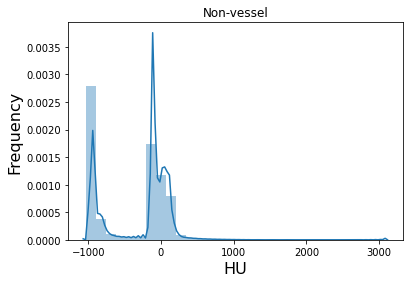

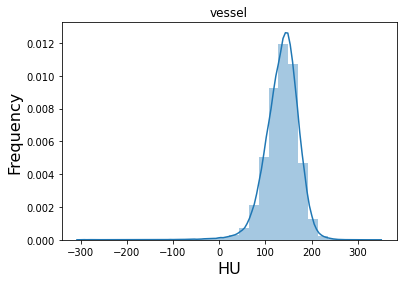

In [ ]:
fig, ax = plt.subplots()
ax = sns.distplot(data_nonvessel.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title('Non-vessel')
plt.grid(False)
plt.show()

fig, ax = plt.subplots()
ax = sns.distplot(data_vessel.ravel(), bins=30)
ax.set_xlabel("HU",fontsize=16)
ax.set_ylabel("Frequency",fontsize=16)
plt.title('vessel')
plt.grid(False)
plt.show()

# Analyze the training set

In [7]:
volume_data, liver_data, vessel_data = dataset[3]

In [ ]:
vol_bg = volume_data[(volume_data != 0)*(liver_data == 0)]
vol_liver = volume_data[(volume_data != 0)*(liver_data != 0)]
vol_vessel = volume_data[vessel_data != 0]

range_hist = (-300, 300)
bins = 60

bg_hist = np.histogram(vol_bg, bins=bins, range=range_hist)
liver_hist = np.histogram(vol_liver, bins=bins, range=range_hist)
vessel_hist = np.histogram(vol_vessel, bins=bins, range=range_hist)

plt.bar(bg_hist[1][:-1], bg_hist[0], 5, color='skyblue', label='Khác')
plt.bar(liver_hist[1][:-1], liver_hist[0], 5, color='green', label='Gan')
plt.bar(vessel_hist[1][:-1], vessel_hist[0], 5, color='blue', label='Mạch máu')

# plt.title('Background and Liver, Vessel Histogram')
plt.xlabel('Giá trị Hounsfield unit (HU)')
plt.ylabel('Tần suất')
plt.legend()
plt.savefig("histogram_preprocess.pdf")
# plt.show()

In [ ]:
for i in range(100, 182):
  print(i)
  plt.imshow(liver_data[i], cmap='gray')
  plt.show()


In [ ]:
liver_data.shape

torch.Size([182, 378, 378])

In [ ]:
def bounding_box(tensor):
    '''
    Finds two corner points that specifies bounding box of input.
    Args:
        input: 3D-tensor needs to be determined bounding box. - numpy
    Returns:
        tuple of indices specifies bounding box, (xstart, ystart, zstart, xstop, ystop, zstop)
    '''
    tensor = torch.tensor(tensor) # convert to torch.tensor
    tensor = tensor.nonzero()
    start, stop = (tensor.min(dim=0)[0]), (tensor.max(dim=0)[0] + 1)
    return start, stop

(-0.5, 329.5, 269.5, -0.5)

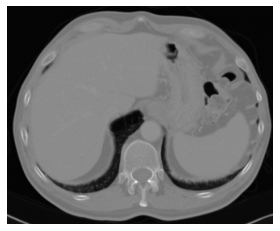

In [ ]:
slice_data = volume_data[146, 50:320, 30:360]
slice_liver = liver_data[146, 50:320, 30:360]
slice_vessel = vessel_data[146, 50:320, 30:360]

plt.imshow(slice_data, cmap='gray')
plt.axis(False)

(-0.5, 329.5, 269.5, -0.5)

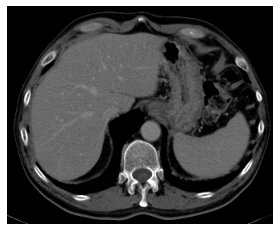

In [ ]:
slice_data = np.clip(slice_data, -100, 400)

plt.imshow(slice_data, cmap='gray')
plt.axis(False)

In [ ]:
start, end = bounding_box(slice_liver)

In [ ]:
start

tensor([34, 30])

In [ ]:
end

tensor([215, 198])

In [ ]:
bound_vol = slice_data[start[0]:end[0], start[1]:end[1]]

(-0.5, 167.5, 180.5, -0.5)

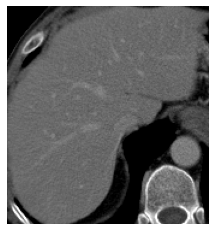

In [ ]:
plt.imshow(bound_vol, cmap='gray')
plt.axis(False)

In [14]:
DIR = '/content/drive/My Drive/Tumor_src/Datasets/3Dircad/Zoom_only_10'
bg = np.array([])
liv = np.array([])
blood = np.array([])

for i in range(20):
    print('Loading patient #{}'.format(i))
    volume = Helper.load_tensor(str(DIR) + '/VOLUME/volume_' + str(i) + '.pth').numpy()
    liver  = Helper.load_tensor(str(DIR) + '/LIVER/volume_' + str(i) + '.pth').numpy()
    vessel = Helper.load_tensor(str(DIR) + '/VESSEL/volume_' + str(i) + '.pth').numpy()
    
    vol_bg = volume[(vessel == 0)*(liver == 0)]
    vol_liver = volume[liver != 0]
    vol_vessel = volume[vessel != 0]
    
    bg = np.append(vol_bg, bg)
    liv = np.append(vol_liver, liv)
    blood = np.append(vol_vessel, blood)
    del volume, liver, vessel

Loading patient #0
Loading patient #1
Loading patient #2
Loading patient #3
Loading patient #4
Loading patient #5
Loading patient #6
Loading patient #7
Loading patient #8
Loading patient #9
Loading patient #10
Loading patient #11
Loading patient #12
Loading patient #13
Loading patient #14
Loading patient #15
Loading patient #16
Loading patient #17
Loading patient #18
Loading patient #19


In [15]:
bg.shape

(638780576,)

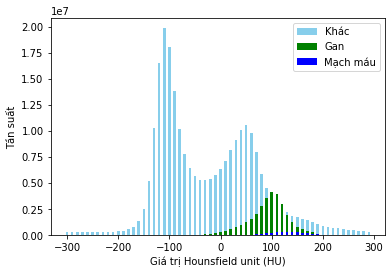

In [16]:
range_hist = (-300, 300)
bins = 60

bg_hist = np.histogram(bg, bins=bins, range=range_hist)
liver_hist = np.histogram(liv, bins=bins, range=range_hist)
vessel_hist = np.histogram(blood, bins=bins, range=range_hist)

plt.bar(bg_hist[1][:-1], bg_hist[0], 5, color='skyblue', label='Khác')
plt.bar(liver_hist[1][:-1], liver_hist[0], 5, color='green', label='Gan')
plt.bar(vessel_hist[1][:-1], vessel_hist[0], 5, color='blue', label='Mạch máu')

# plt.title('Background and Liver, Vessel Histogram')
plt.xlabel('Giá trị Hounsfield unit (HU)')
plt.ylabel('Tần suất')
plt.legend()
plt.savefig("histogram_preprocess.pdf")